# Home Assignment No. 3

To solve this task, you will write a lot of code to try several machine learning methods for classification and regression.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of your own code. There exists a class/method for almost everything you can imagine (related to this homework).

* You have to write **CODE** directly inside specified places marked by comments: **BEGIN/END Solution**. Do not create new cells.

* In some problems you are asked to provide a short discussion of the results. For that find the specific place marked via **Your text answer: \<write your answer\>**.

* For every separate problem or subproblem (if specified) you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task.

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e., if the reviewer decides to restart the notebook and run all cells, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest fixing random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include necessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

* Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameters and set it to `-1` to use all the cores.


In [173]:
# Your imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



## Task 1 - Gaussian Processes (1 pt.)

In the following exercise, you will need to fit the gaussian process with different kernels on the ```elecricity_consumption_FR.csv``` time series data. We have already loaded and prepared the train/test datasets for you below.

Use [**GPy**](https://pypi.python.org/pypi/GPy) library for training and prediction. Fit a GP and run the predict on the test. Useful kernels to combine: `GPy.kern.RBF, GPy.kern.Poly, GPy.kern.StdPeriodic, GPy.kern.White, GPy.kern.Linear`. 

**The task**:
* Normalize the target value by fitting a transformation on the train (use ```sklearn.preprocessing.StandardScaler```)
* Plot the resulting target against the time index.
* Plot mean and confidence interval of the prediction. 
* Inspect them on normality by scatter plot: plot predicted points/time series against true values. 
* Estimate the prediction error with `r2_score`. R2-score accepted > 0.7 on test sample.

In [3]:
! pip install GPy==1.9.9

     |████████████████████████████████| 995 kB 13.3 MB/s 
     |████████████████████████████████| 71 kB 7.5 MB/s 
  Created wheel for GPy: filename=GPy-1.9.9-cp37-cp37m-linux_x86_64.whl size=2627263 sha256=896cf879562c91436f62613add3cfd3e5322e9e6006189eef89037c6dee77c0a
  Stored in directory: /root/.cache/pip/wheels/e4/05/38/b84c6bec7ea9dc623cdbdb6203b55b3abe7a7020a992f2064c
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102566 sha256=aa610d91cd57dee6ca14a5ed3ff60d123c6c1872b34d42d8099512a2c76fdad9
  Stored in directory: /root/.cache/pip/wheels/c8/95/f5/ce28482da28162e6028c4b3a32c41d147395825b3cd62bc810
Successfully built GPy paramz


In [174]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import GPy
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


In [175]:
data = pd.read_csv('elecricity_consumption_FR.csv')

In [176]:
data.dropna(inplace=True)

In [177]:
y = np.array(data.values)
X = np.array(data.index)

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.3)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)


Normalize the target value by fitting a transformation on the train (use sklearn.preprocessing.StandardScaler)

In [179]:
### BEGIN SOLUTION (do not delete this comment!)

scaler = StandardScaler()
scaler.fit(y_train)
y_train=scaler.transform(y_train)
y_test=scaler.transform(y_test)

### END SOLUTION (do not delete this comment!)

Plot the resulting target against the time index.

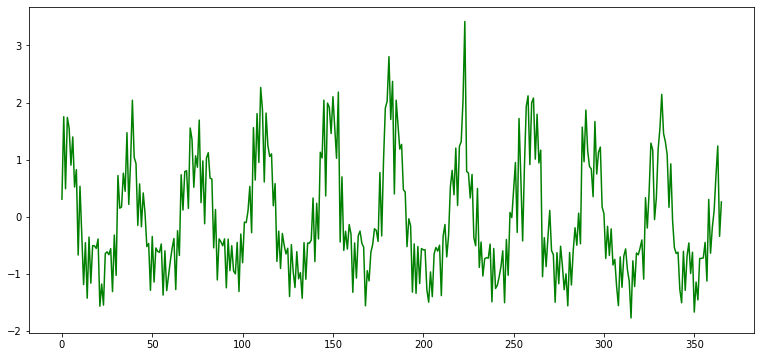

In [180]:
### BEGIN SOLUTION (do not delete this comment!)
plt.figure(figsize=(13,6))  
plt.plot(list(X_train)+list(X_test), list(y_train)+list(y_test),c='green',linewidth=1.5)
plt.show()


    
### END SOLUTION (do not delete this comment!)

Plot mean and confidence interval of the prediction.

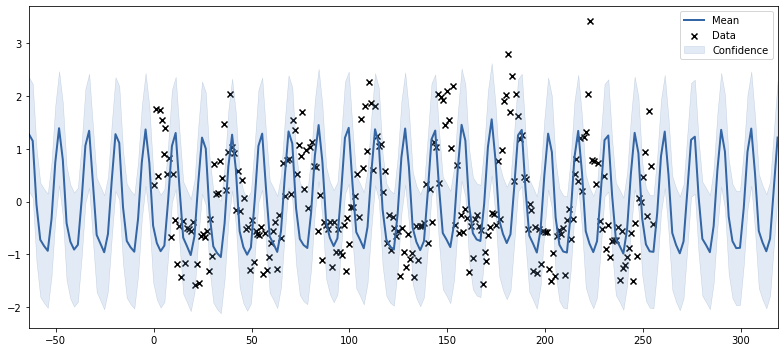

In [184]:
### BEGIN SOLUTION (do not delete this comment!)
input_dim = 1
variance = 1

lengthscale = 2
kernel = GPy.kern.RBF(input_dim, variance=variance, lengthscale=lengthscale) + GPy.kern.StdPeriodic(1)
model = GPy.models.GPRegression(X_train, y_train, kernel)
model.optimize()
model.plot(figsize=(11, 5),linewidth=4)
plt.show()

### END SOLUTION (do not delete this comment!))

Inspect them on normality by scatter plot: plot predicted points/time series against true values.

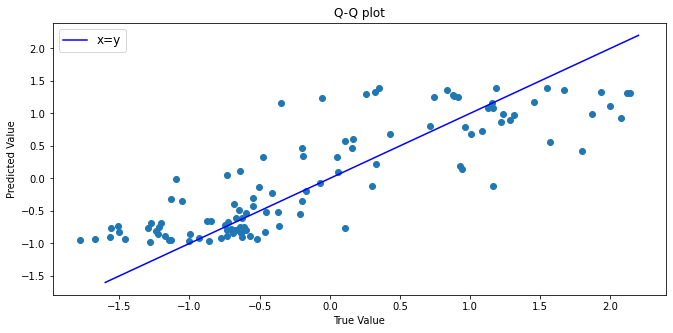

In [185]:

### BEGIN SOLUTION (do not delete this comment!)
plt.figure(figsize=(11,5))
plt.scatter(y_test,model.predict(X_test)[0])
plt.plot(np.arange(-1.6,2.3,0.1),np.arange(-1.6,2.3,0.1),c='blue',label='x=y')
plt.legend(loc='upper left',fontsize=12)
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Q-Q plot')
plt.show()


### END SOLUTION (do not delete this comment!)

Estimate the prediction error with r2_score. R2-score accepted > 0.7 on test sample.

In [186]:
### BEGIN SOLUTION (do not delete this comment!)
r2_score(y_test,model.predict(X_test)[0])


### END SOLUTION (do not delete this comment!)

0.7119172123744566

## Task 2 - MNIST, kMNIST component analysis and manifold learning. (5 pts.)

### Task 2.1. (1 pt)

Download `MNIST` dataset. Here we will estimate the data intrinsic dimensionality, decompose the dataset on principle components and estimate the cumulative explained variance by each component.

You can either use the [proposed method](https://www.stat.berkeley.edu/~bickel/mldim.pdf) for the estimation of sample intrinsic dimension or any other method (convenient for you). For the first case, yoyu may use the code from [here](https://gist.github.com/mehdidc/8a0bb21a31c43b0cbbdd31d75929b5e4)

1. Estimate the intrinsic dimensionality of the dataset. Provide the plot.
2. Decompose the data on principal components (PCA). Plot the cumulative explained variance by each component. Plot the example of back-decomposition with **6** different set of components and corresponding explained variance. You can choose any digit from the dataset.

In [187]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

dg = datasets.load_digits()

scaler = StandardScaler().fit(dg.data)
data = scaler.transform(dg.data)

1) Estimate the intrinsic dimentionality of the dataset. Provide the plot.

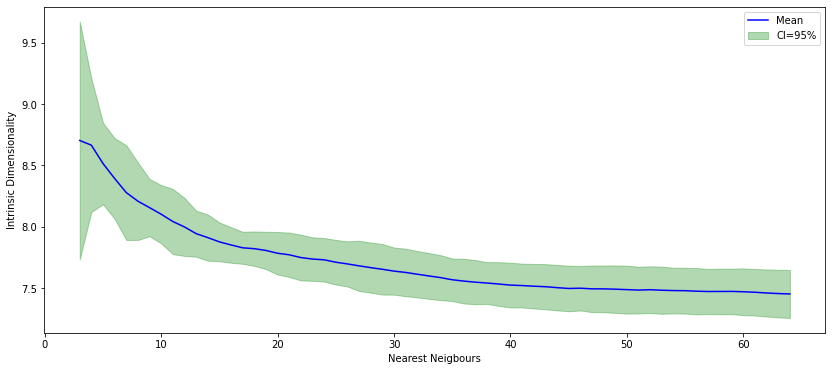

In [188]:
### BEGIN SOLUTION (do not delete this comment!)

from sklearn.neighbors import NearestNeighbors
 
def intrinsic_dim_sample_wise(X, k=5):
    neighb = NearestNeighbors(n_neighbors=k+1).fit(X)
    dist, ind = neighb.kneighbors(X) # distances between the samples and points
    dist = dist[:, 1:] # the distance between the first points to first points (as basis ) equals zero
    # the first non trivial point
    dist = dist[:, 0:k]# including points k-1
    assert dist.shape == (X.shape[0], k) # requirments are there is no equal points
    assert np.all(dist > 0)
    d = np.log(dist[:, k - 1: k] / dist[:, 0:k-1]) # dinstance betveen the bayeasian statistics
    d = d.sum(axis=1) / (k - 2)
    d = 1. / d
    intdim_sample = d
    return intdim_sample
 
def intrinsic_dim_scale_interval(X, k1=10, k2=20):
    X = pd.DataFrame(X).drop_duplicates().values # remove duplicates in case you use bootstrapping
    intdim_k = []
    for k in range(k1, k2 + 1): # in order to reduse the noise by eliminating of the nearest neibours 
        m = intrinsic_dim_sample_wise(X, k).mean()
        intdim_k.append(m)
    return intdim_k
 
def repeated(func, X, nb_iter=100, random_state=2, mode='bootstrap', **func_kw):
    rng = np.random.RandomState(random_state)
    nb_examples = X.shape[0]
    results = []
 
    iters = range(nb_iter) 
    for i in iters:
        if mode == 'bootstrap':# and each point we want to resample with repeating points to reduse the errors 
            #232 111 133 
            Xr = X[rng.randint(0, nb_examples, size=nb_examples)]
        elif mode == 'shuffle':
            ind = np.arange(nb_examples)
            rng.shuffle(ind)
            Xr = X[ind]
        elif mode == 'same':
            Xr = X
        else:
            raise ValueError('unknown mode : {}'.format(mode))
        results.append(func(Xr, **func_kw))
    return results
import warnings
warnings.filterwarnings("ignore")

k1 = 3 # start of interval(included)
k2 = 64 # end of interval(included)
nb_iter = 6 # more iterations more accuracy

intdim_k_repeated = repeated(intrinsic_dim_scale_interval, 
                             data, 
                             mode='bootstrap', 
                             nb_iter=nb_iter, # nb_iter for bootstrapping
                             k1=k1, k2=k2)
intdim_k_repeated = np.array(intdim_k_repeated)

x = np.arange(k1, k2+1)

plt.figure(figsize=(14, 6))
plt.plot(x, np.mean(intdim_k_repeated, axis=0), 'b', label='Mean') # it is the mean walue
plt.fill_between(x, 
                 np.mean(intdim_k_repeated, axis=0) - 
                 2 * np.std(intdim_k_repeated, axis=0),
                 np.mean(intdim_k_repeated, axis=0) + 
                 2 * np.std(intdim_k_repeated, axis=0),
                 alpha=0.3,
                 label='CI=95%',
                 color='g')
plt.xlabel("Nearest Neigbours")
plt.ylabel("Intrinsic Dimensionality")
plt.legend()
plt.show()

### END SOLUTION (do not delete this comment!)

2) Decompose the data on principal components (PCA). Plot the cumulative explained variance by each component. Plot the example of back-decomposition with 6 different set of components and corresponding explained variance. You can choose any digit from the dataset.

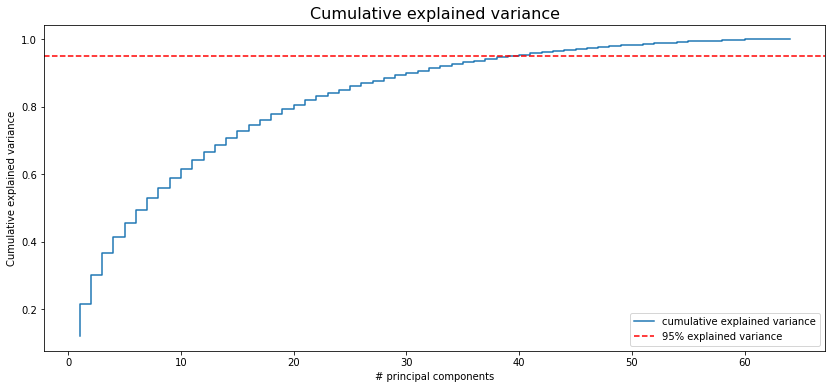

In [189]:
### BEGIN SOLUTION (do not delete this comment!)
plt.figure(figsize=(14, 6))

pca=PCA(n_components=64, random_state=13)
data_pca=pca.fit_transform(data)
cum_var=pca.explained_variance_ratio_.cumsum()
plt.step(np.arange(1,65),cum_var,label='cumulative explained variance')
plt.axhline(y=0.95, color='r', linestyle='--',label='95% explained variance')
plt.legend()
plt.title('Cumulative explained variance',fontsize=16)
plt.xlabel('# principal components')
plt.ylabel('Cumulative explained variance')
plt.show()
### END SOLUTION (do not delete this comment!)

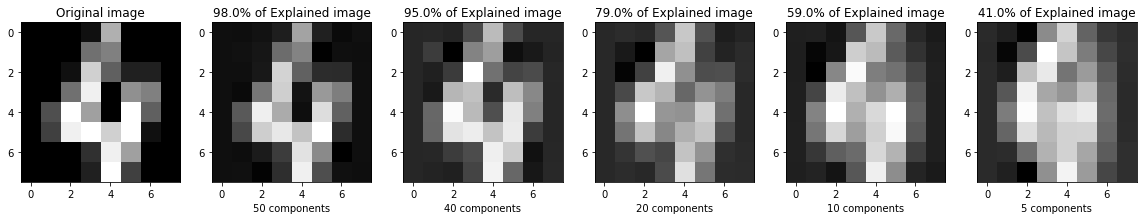

In [191]:
### BEGIN SOLUTION (do not delete this comment!)
from matplotlib.colors import NoNorm
fig, ax = plt.subplots(1, 6, figsize=(20, 20))
j=[49,39,19,9,4]
ax[0].imshow(dg.images[4],cmap='gray')
ax[0].set_title('Original image')
ax[0].tick_params(axis="x", bottom=True, top=False, labelbottom=True, labeltop=False)
for i in range(5,0,-1):
    pca=PCA(n_components=j[i-1], random_state=13)
    data_pca = pca.fit_transform(data)
    approx = scaler.inverse_transform(pca.inverse_transform(data_pca))
    ax[i].imshow(approx[4].reshape(8, 8),cmap=plt.cm.gray, interpolation='nearest')
    ax[i].set_title(f'{np.round(cum_var[j[i-1]],2)*100}% of Explained image')
    ax[i].set_xlabel(f'{j[i-1]+1} components')
    ax[i].tick_params(axis="x", bottom=True, top=False, labelbottom=True, labeltop=False)
plt.show()
### END SOLUTION (do not delete this comment!)



### Task 2.2. (1 pt.)

Here we will visualize the decomposition in order to observe how data diverges across different manifold learning methods. We are to compare `PCA`, `ICA` and `Isomap` non-linear decompositions [see more over here https://scikit-learn.org/stable/modules/manifold.html], and check the classification accuracy on the new features. 

1. Calculate new features on the data with ICA, PCA and Isomap. **Choose the number of components according to your estimation of intrinsic dimension**. Calculate the classification accuracy on these features with `LogisticRegression` on `cross_val=5` with $3$ repeats. Use `RepeatedKFold` and fit the `random_seed = 42`.
2. Show that the `Isomap` gives a statistically significant improvement on the classification accuracy with any appropriate statistical test. Provide corresponding `p-values`. Justify your results, write down 2-3 sentences.


In [192]:
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy import stats
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import Isomap

1) Calculate new features on the data with ICA, PCA and Isomap. Choose the number of components according to your estimation of intrinsic dimention. Calculate the classification accuracy on these features with LogisticRegression on cross_val=5 with  3  repeats. Use RepeatedKFold and fit the random_seed = 42.

In [193]:
### BEGIN SOLUTION (do not delete this comment!)
Y=dg.target

pca=PCA(n_components=7,random_state=42)
ica = FastICA(n_components=7,random_state=42)
isomap=Isomap( n_components=7)

X_ica = ica.fit_transform(data)
X_pca = pca.fit_transform(data)
X_isomap= isomap.fit_transform(data)


rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
def evaluation(data,Y):
    acc=[]
    for train_index, test_index in rkf.split(data):
        X_train, X_test = data[train_index], data[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        logit=LogisticRegression().fit(X_train,y_train)
        acc.append(accuracy_score(logit.predict(X_test),y_test))
    return np.mean(acc),acc
ica_eval=evaluation(X_ica,Y)
pca_eval=evaluation(X_pca,Y)
isomap_eval=evaluation(X_isomap,Y)

print(f'PCA:{pca_eval[0]}')
print(f'FastICA:{ica_eval[0]}')
print(f'Isomap:{isomap_eval[0]}')
### END SOLUTION (do not delete this comment!)



PCA:0.856057464149386
FastICA:0.6826281852883526
Isomap:0.951953471577427


2) Show that the `Isomap` gives statistically significant improvement on the classification accuracy with any appropriate statistical test. Provide corresponding `p-values`. 

In [194]:
### BEGIN SOLUTION (do not delete this comment!)
# I wil produce paired t test on CV sets
from scipy.stats import t as t_dist
def paired_t_test(p):
    t = (np.mean(p) * (len(p)**(1/2))) / (np.sqrt(sum([(diff - np.mean(p))**2 for diff in p]) / (len(p) - 1)))
    p_value = t_dist.sf(t, len(p)-1)*2
    
    return t, p_value
t1,p1=paired_t_test(np.array(isomap_eval[1])-np.array(pca_eval[1]))
print('T test with alternative hypothesis that Isomap has greater accuracy than PCA')
print(f'Statistics: {t1}   p-value: {p1}')
t2,p2=paired_t_test(np.array(isomap_eval[1])-np.array(ica_eval[1]))
print('T test with alternative hypothesis that Isomap has greater accuracy than PCA')
print(f'Statistics: {t2}   p-value: {p2}')

### END SOLUTION (do not delete this comment!)

T test with alternative hypothesis that Isomap has greater accuracy than PCA
Statistics: 18.47223349110959   p-value: 3.1487369480948094e-11
T test with alternative hypothesis that Isomap has greater accuracy than PCA
Statistics: 32.50491297889172   p-value: 1.3779050143055693e-14


### Task 2.3. (1 pt.)

3) Justify your results, write down 2-3 senteces.

*BEGIN SOLUTION (do not delete this comment!)*

First of all we can make a conclusion that zero hypothesis is rejected in both cases in favour of alternative, since p-value is lower then any reasonable(1%,5%) signinficance level , meaning that there is strong statistical evidence,in favour of Isomap dimnesion reduction. Such a result may occur due to the fact that our data has non-linear nature and Isomap has an ability to reduce dimnesion of non-linear data, while PCA and ICA only supports linear transformation of the data , therefore Isomap is capable of reducing the dimension, with lower loss of the importnat information, which imporoves the predictive power of the model.

*END SOLUTION (do not delete this comment!)*

### Task 2.4. kMNIST dimensionality reduction. (2 pts.)

Explore `KMNIST` dataset https://github.com/rois-codh/kmnist. You are to engineer new features (by using any familiar to you method of Manifold Learning) to increase the classification accuracy. Use the `KNN` classifier with any hyperparameters you like.

1. __(2 pt.)__ Get accuracy on `test_set` more than 93%`. 

**NOTE** that the data is rather heavy, thus your decomposition will take a while.

__Hint:__ Try to use dimensionality reduction methods, which yield better model performance on `MNIST`. These methods can compete with Autoencoders on `torch`. 

1) Get accuracy on test_set more than 93%.

In [195]:
import numpy as np

In [196]:
from sklearn.neighbors import KNeighborsClassifier

def load(f):
    return np.load(f)['arr_0']

# Load the data
x_train = load('kmnist-train-imgs.npz')
x_test = load('kmnist-test-imgs.npz')
y_train = load('kmnist-train-labels.npz')
y_test = load('kmnist-test-labels.npz')

# Reshape the data
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [197]:
### BEGIN SOLUTION (do not delete this comment!)
pca3=PCA(n_components=60,random_state=42)
pca3.fit(x_train)
x_train_pca= pca3.transform(x_train)
x_test_pca= pca3.transform(x_test)
knn=KNeighborsClassifier(n_neighbors=4,weights='distance')

knn.fit(x_train_pca,y_train)
accuracy_score(knn.predict(x_test_pca),y_test)
### END SOLUTION (do not delete this comment!)

0.9402

## Task 3 - Clustering (2 pts.)

### Task 3.1. Explore KMeans and Gaussian Mixture algorithms (1 pt.)

Try **KMeans, Gaussian Mixture** and **two** more clustering algorithms from sklearn. 
To evaluate clustering performance use **two** clustering metrics: *silhouette score*
and *mutual information* or *adjusted mutual information*.

For each algorithm **your task** is to try to find the parameters leading to the best performance for `n_clusters=true_number_of_clusters`:
1. Apply the algorithm with the true number of clusters and try out at least two **other variants** of the number of clusters: a smaller and a larger one than the true number.;
2. For each number of clusters **visualize the clustering result**, calculate the **clustering metrics** and plot them;

__NOTE:__ `sklearn.model_selection.GridSearchCV` does not support clustering methods, thus you suppose to do it manually.

In [198]:
import numpy as np

True number of clusters is 15


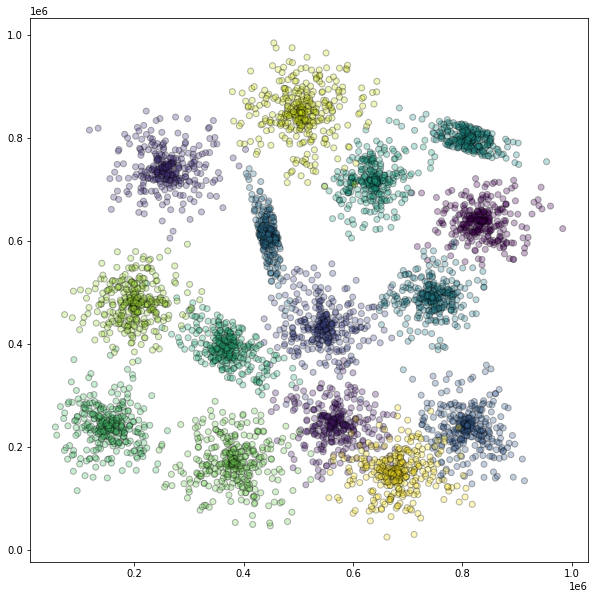

In [199]:
points, labels = np.loadtxt('clustering.txt'), np.loadtxt('clustering_labels.txt')
labels = labels.astype(int)
print("True number of clusters is {}".format(np.max(labels)))
plt.figure(figsize=(10, 10))
plt.scatter(points[:,0], points[:,1], c=labels, alpha=0.3, edgecolor='k')

plt.show()

In [200]:
from sklearn.cluster import KMeans,AgglomerativeClustering,Birch
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, mutual_info_score
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler

1) For each algorithm your task is to try to find the parameters leading to the best performance for n_clusters=true_number_of_clusters

In [201]:
### BEGIN SOLUTION (do not delete this comment!)

#Agglomerative clustering
linkage=['ward', 'complete', 'average','single']
affinity=['euclidean', 'l1', 'l2', 'manhattan', 'cosine']
scores_agg=[]
for link in linkage:
    if link=='ward':
        aff=affinity[0]
        aggl=AgglomerativeClustering(n_clusters=15,linkage=link,affinity=aff)
        scores_agg.append([link,aff,mutual_info_score(labels,aggl.fit_predict(points))])
    else:
        for aff in affinity:
            aggl=AgglomerativeClustering(n_clusters=15,linkage=link,affinity=aff)
            scores_agg.append([link,aff,mutual_info_score(labels,aggl.fit_predict(points))])
agg_best=pd.DataFrame(np.array(scores_agg)).sort_values(by=2,ascending=False).head(1)

agg_best_link=agg_best[0].values[0]
agg_best_aff=agg_best[1].values[0]

#KMeans
max_iter=[300,400,500]
tols=[0.00001,0.0001,0.0005,0.001]
algorithm=['full' ,'elkan']
scores_km=[]
for iter in max_iter:
    for tol in tols:
      for algo in algorithm:
        km=KMeans(n_clusters=15,algorithm=algo,tol=tol,max_iter=iter,random_state=42)
        scores_km.append([iter,tol,algo,mutual_info_score(labels,km.fit_predict(points))])
km_best=pd.DataFrame(np.array(scores_km)).sort_values(by=3,ascending=False).head(1)

km_best_iter=km_best[0].values[0]
km_best_tol=km_best[1].values[0]
km_best_algo=km_best[2].values[0]

#Birch
threshold=[0.4,0.45,0.5,0.55,0.6]
branching_factor=[40,45,50,55,60]
scores_bir=[]

for thr in threshold:
    for branch in branching_factor:
      birch=Birch(n_clusters=15,threshold=thr,branching_factor=branch)
      scores_bir.append([thr,branch,mutual_info_score(labels,birch.fit_predict(points))])
bir_best=pd.DataFrame(np.array(scores_bir)).sort_values(by=2,ascending=False).head(1)

bir_best_thr=bir_best[0].values[0]
bir_best_branch=bir_best[1].values[0]

#GaussianMixture
tols=[0.00001,0.0001,0.0005,0.001]
reg_covar=[0.000001,0.00001,0.00005,0.0001]
init_params=['kmeans', 'random']
scores_gm=[]

for tol in tols:
    for reg in reg_covar:
      for init in init_params:
        gaus_mix=GaussianMixture(n_components=15, random_state=42
                                 ,tol=tol,reg_covar=reg,init_params=init)
        scores_gm.append([tol,reg,init,mutual_info_score(labels,gaus_mix.fit_predict(points))])
gm_best=pd.DataFrame(np.array(scores_gm)).sort_values(by=3,ascending=False).head(1)

gm_best_tol=gm_best[0].values[0]
gm_best_reg=gm_best[1].values[0]
gm_best_init=gm_best[2].values[0]


print('I chose the parameters on the basis of the mutual_info_score')

print(f'For AgglomerativeClustering the best result was shown on linkage = {agg_best_link} and affinity = {agg_best_aff} ')
print(f'For KMeans the best result was shown on max_iter = {km_best_iter}  tolerance = {km_best_tol} and algorythm = {km_best_algo} ')
print(f'For Birch the best result was shown on threshold = {bir_best_thr} and branching_factor = {bir_best_branch} ')
print(f'For GaussianMixture the best result was shown on tolerance = {gm_best_tol},reg_covar = {gm_best_reg} and init_params={gm_best_init}')

### END SOLUTION (do not delete this comment!)

I chose the parameters on the basis of the mutual_info_score
For AgglomerativeClustering the best result was shown on linkage = average and affinity = euclidean 
For KMeans the best result was shown on max_iter = 300  tolerance = 1e-05 and algorythm = full 
For Birch the best result was shown on threshold = 0.4 and branching_factor = 40.0 
For GaussianMixture the best result was shown on tolerance = 1e-05,reg_covar = 1e-06 and init_params=kmeans


2) Apply the algorithm with the true number of clusters and try out at least two other variants of the number of clusters: a smaller and a larger one than the true number.;

 Do not forget that despite the plot picturing just the KMeans and GuassianMizture, you will need to ADDITIONALLY try put and plot two other clustering methods. 

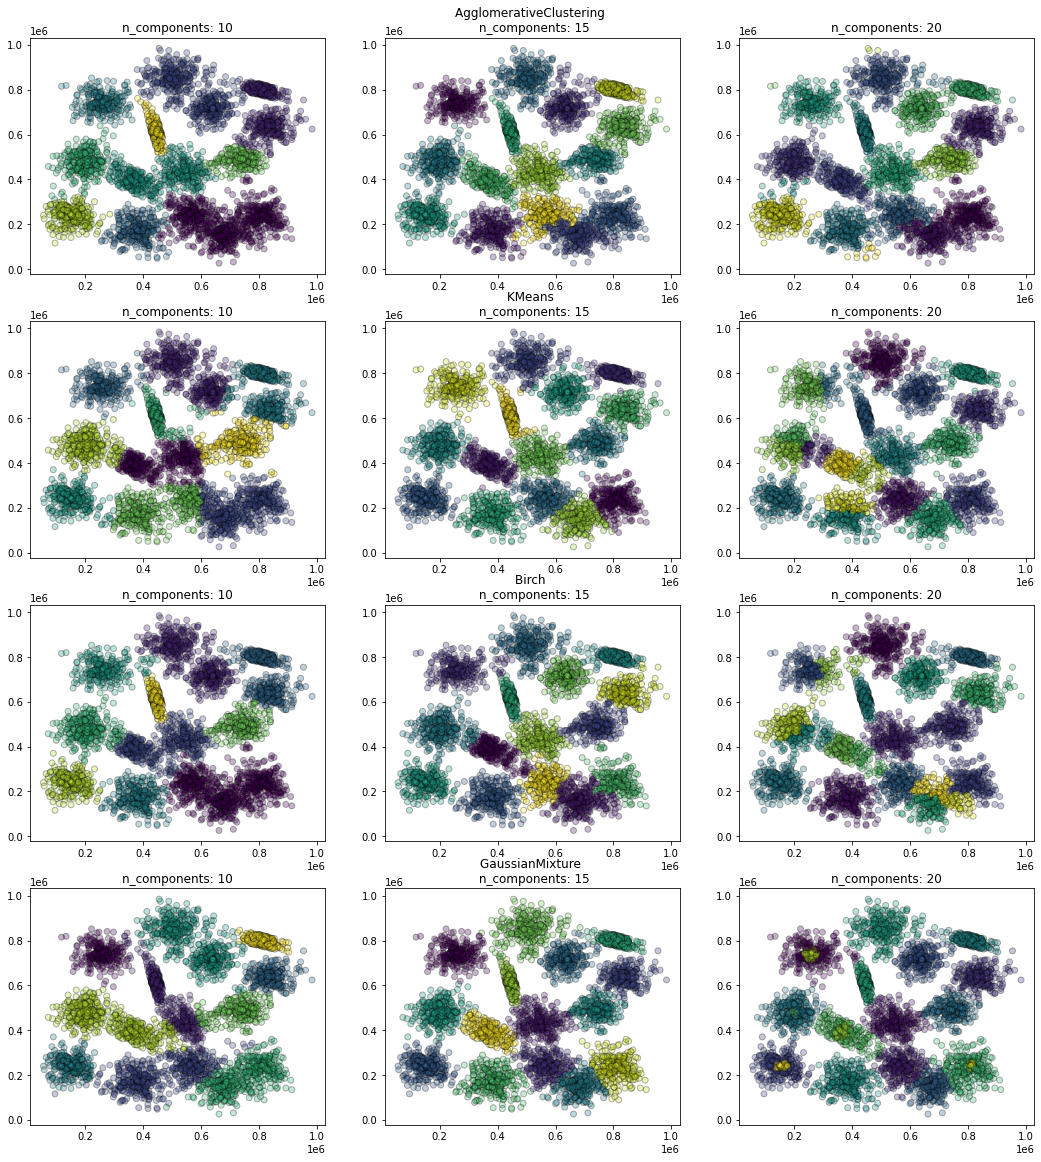

In [202]:
# BEGIN SOLUTION (do not delete this comment!)
true_N=np.max(labels)
n_s=[10,15,20]

fig,ax=plt.subplots(4,3,figsize=(18,20))
i=0
j=0
for n in n_s:
    algos=[AgglomerativeClustering(n_clusters=n,linkage=agg_best_link,affinity=agg_best_aff),
         KMeans(n_clusters=n,algorithm=km_best_algo,tol=float(km_best_tol),max_iter=int(km_best_iter),random_state=42),
         Birch(n_clusters=n,threshold=float(bir_best_thr),branching_factor=int(bir_best_branch)),
         GaussianMixture(n_components=n, random_state=42
                                 ,tol=float(gm_best_tol),reg_covar=float(gm_best_reg),init_params=gm_best_init)]
    for algo in algos:
        labels=algo.fit_predict(points)
        #ax[j].set_title()
        ax[j][i].scatter(points[:,0], points[:,1], c=labels, alpha=0.3, edgecolor='k')
        if i==1:
            ax[j][i].set_title(f'{type(algo).__name__} \n n_components: {n}')
        else:
            ax[j][i].set_title(f'n_components: {n}')
        j+=1
        

    j=0
    i+=1
    
### END SOLUTION (do not delete this comment!)

2) For each number of clusters vizualize the clustering result, calculate the clustering metrics and plot them;


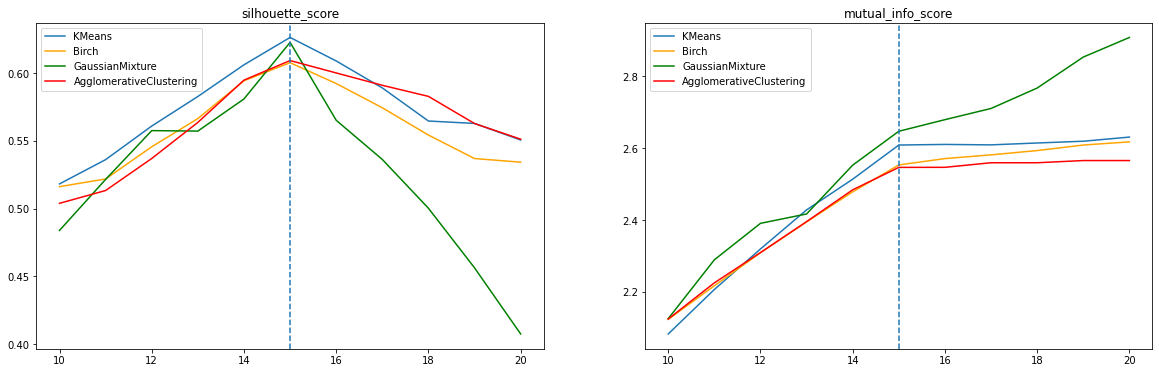

In [203]:
### BEGIN SOLUTION (do not delete this comment!)
N=np.arange(10,21)

kmeans_sil=[]
birch_sil=[]
gaus_mix_sil=[]
agg_cl_sil=[]

kmeans_mut=[]
birch_mut=[]
gaus_mix_mut=[]
agg_cl_mut=[]

silhouette_score, mutual_info_score

for i in N:
#KMeans
    kmeans =  KMeans(n_clusters=i,algorithm=km_best_algo,tol=float(km_best_tol),max_iter=int(km_best_iter),random_state=42)
    kmeans_sil.append(silhouette_score(points,kmeans.fit_predict(points)))
    kmeans_mut.append(mutual_info_score(labels,kmeans.fit_predict(points)))
# Birch
    birch=Birch(n_clusters=i,threshold=float(bir_best_thr),branching_factor=int(bir_best_branch))
    birch_sil.append(silhouette_score(points,birch.fit_predict(points)))
    birch_mut.append(mutual_info_score(labels,birch.fit_predict(points)))
#GaussianMixture
    gaus_mix=GaussianMixture(n_components=i, random_state=42
                                 ,tol=float(gm_best_tol),reg_covar=float(gm_best_reg),init_params=gm_best_init)
    gaus_mix_sil.append(silhouette_score(points,gaus_mix.fit_predict(points)))
    gaus_mix_mut.append(mutual_info_score(labels,gaus_mix.fit_predict(points)))
#AgglomerativeClustering
    agg_cl=AgglomerativeClustering(n_clusters=i,linkage=agg_best_link,affinity=agg_best_aff)
    agg_cl_sil.append(silhouette_score(points,agg_cl.fit_predict(points)))
    agg_cl_mut.append(mutual_info_score(labels,agg_cl.fit_predict(points)))
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,6)) 

ax1.plot(N,kmeans_sil,label='KMeans',)
ax1.plot(N,birch_sil,label='Birch',c='orange')
ax1.plot(N,gaus_mix_sil,label='GaussianMixture',c='green')
ax1.plot(N,agg_cl_sil,label='AgglomerativeClustering',c='r')
ax1.axvline(15,linestyle='--')
ax1.set_title('silhouette_score')
ax1.legend()

ax2.plot(N,kmeans_mut,label='KMeans')
ax2.plot(N,birch_mut,label='Birch',c='orange')
ax2.plot(N,gaus_mix_mut,label='GaussianMixture',c='green')
ax2.plot(N,agg_cl_mut,label='AgglomerativeClustering',c='r')
ax2.axvline(15, linestyle='--')
ax2.set_title('mutual_info_score')
ax2.legend()
plt.show()    


    

### END SOLUTION (do not delete this comment!)

### Task 3.2. Finding the Number of Clusters with Bootstrap. (1 pt.)
For a chosen algorithm find the best number of clusters using bootstrap. Based on your observations made at the previous task, choose one algorithm assuming **you do not have true labels and do not know the true number of clusters**.
1. Estimate variance of the clustering metric of your choice (i.e. *silhouette score*/*mutual information*/*adjusted mutual information*)and construct normal 95% **confidence interval (CI)**;
2. **Plot the metric** with the corresponding confidence intervals and show the best number of clusters.

__Hints:__ 
- you can choose bootstrap samples with any size, and sample number starting from `50`;
- you can use `scipy.stats.norm.interval()` to derive CI;

1) Estimate variance of the clustering metric of your choice (i.e. silhouette score/mutual information/adjusted mutual information)and construct normal 95% confidence interval (CI);

In [204]:
### BEGIN SOLUTION (do not delete this comment!)

import sklearn
from sklearn.utils import resample


from sklearn import cluster
from tqdm import tqdm_notebook

N=np.arange(10,21)
sample_number = 20
mean_score=[]
var_score=[]
up_bound=[]
down_bound=[]
for  n in N:
    sil_score = []
    clf = sklearn.cluster.KMeans(n_clusters = n, random_state = 42)
    for sample_index in range(sample_number):
        bootsrapped_points = sklearn.utils.resample(points, n_samples=points.shape[0])
        clf.fit(bootsrapped_points)
        sil_score.append(silhouette_score(bootsrapped_points, clf.predict(bootsrapped_points), random_state = 42))
    mean_score.append(np.mean(sil_score))
    var_score.append(np.std(sil_score)**2)

    up_bound.append(stats.norm.interval(0.95, loc=np.mean(sil_score),scale=np.std(sil_score))[1])
    down_bound.append(stats.norm.interval(0.95, loc=np.mean(sil_score),scale=np.std(sil_score))[0])



### END SOLUTION (do not delete this comment!)


2) Plot the metric with the corresponding confidence intervals and show the best number of clusters.

Number of clusters: 10 
	 Variance: 1.9159949903993467e-05 
 Confidence interval: (0.5095085445159573, 0.5266668845945026)
Number of clusters: 11 
	 Variance: 5.859337724986466e-05 
 Confidence interval: (0.5205746760646962, 0.5505802785996062)
Number of clusters: 12 
	 Variance: 1.9013420657674908e-05 
 Confidence interval: (0.5508044901407578, 0.5678970935114551)
Number of clusters: 13 
	 Variance: 1.893760859770551e-05 
 Confidence interval: (0.576168981300049, 0.5932274740342278)
Number of clusters: 14 
	 Variance: 1.792222743846454e-05 
 Confidence interval: (0.6047978753663129, 0.6213927539353145)
Number of clusters: 15 
	 Variance: 1.8586316492378052e-05 
 Confidence interval: (0.6191085818376365, 0.6360081166754785)
Number of clusters: 16 
	 Variance: 2.79038232570983e-05 
 Confidence interval: (0.6023801062937832, 0.6230867610677511)
Number of clusters: 17 
	 Variance: 3.1496510384636536e-05 
 Confidence interval: (0.5820134102818233, 0.6040127327839502)
Number of clusters: 18

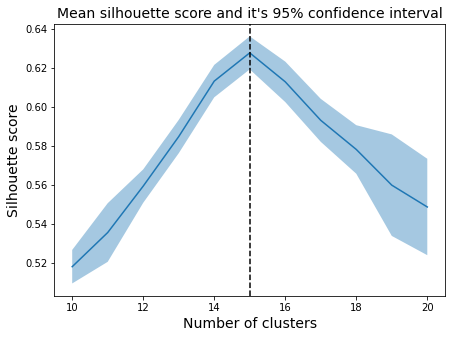

In [207]:
### BEGIN SOLUTION (do not delete this comment!)
  
for i in range(0,len(N)):
    print(f'Number of clusters: {N[i]} \n	 Variance: {var_score[i]} \n Confidence interval: {(down_bound[i], up_bound[i])}')

plt.figure(figsize = (7,5))
plt.plot(N, mean_score)
plt.fill_between(N,up_bound,down_bound, alpha=0.4)
plt.title("Mean silhouette score and it's 95% confidence interval",fontsize=14)
plt.xlabel('Number of clusters',fontsize=14)   
plt.ylabel('Silhouette score',fontsize=14)
plt.axvline(N[np.argmax(mean_score)],ls='--',c='k')
plt.grid(False)
plt.show()
### END SOLUTION (do not delete this comment!)

## Task 4. Practice with Different Anomaly Detection Algorithms. (2 pts)

### Task 4.1 (1 pt)

- Here we will use __fraud_dataset__ (creditcard.csv )
- Compute the __contamination__ (or impurity) on the **test** set as the ratio of anomaly objects to all the objects.  
- Predict the anomaly with any **three** Anomaly detection methods among ones from: https://scikit-learn.org/stable/modules/outlier_detection.html, note, we do not use true labels to fit anomaly detectors.
- Explore, how the `roc_auc_score` for anomaly detectors changes with `contamination` value, taking a grid `[0.1*contamination, 1*contamination, 10*contamination]`. Point out the best performing algorithm.

In [208]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_score
from sklearn.ensemble import IsolationForest 
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope

data = pd.read_csv('creditcard.csv')

X = data.drop(columns="Class")
y = data["Class"]

# keep the split fixed
tt_split = train_test_split(X, y, test_size = 0.1, stratify=y, random_state= 42)
train_X, test_X, train_y, test_y = tt_split 

# delete the targets for training
train_y = 0

In [209]:
### BEGIN SOLUTION (do not delete this comment!)
  
# impurity estimation on test data
impurity = np.mean(test_y)
print(impurity)

### END SOLUTION (do not delete this comment!)

0.01693743518838576


In [210]:
### BEGIN SOLUTION (do not delete this comment!)

# Choose three anomaly detection models
for i in [0.1, 1, 10]:
    an_det=[IsolationForest(contamination=impurity*i),
          EllipticEnvelope(contamination=impurity*i),
          LocalOutlierFactor(contamination=impurity*i)]
    for algorythm in an_det:
        try:
            pred = algorythm.fit_predict(test_X)
        except:
            algorythm.fit(train_X)
            pred= algorythm.predict(test_X)

        pred = np.array(pred < 0, dtype=int)
        print(type(algorythm).__name__,': Contamination: ', np.round(impurity * i, 3), ' ', 
            'ROC/AUC: ', np.round(roc_auc_score(test_y, pred), 3),
            'Precision: ', np.round(precision_score(test_y, pred, average = 'micro'), 3))
    

### END SOLUTION (do not delete this comment!)

IsolationForest : Contamination:  0.002   ROC/AUC:  0.541 Precision:  0.984
EllipticEnvelope : Contamination:  0.002   ROC/AUC:  0.52 Precision:  0.983
LocalOutlierFactor : Contamination:  0.002   ROC/AUC:  0.499 Precision:  0.981
IsolationForest : Contamination:  0.017   ROC/AUC:  0.751 Precision:  0.983
EllipticEnvelope : Contamination:  0.017   ROC/AUC:  0.772 Precision:  0.985
LocalOutlierFactor : Contamination:  0.017   ROC/AUC:  0.512 Precision:  0.968
IsolationForest : Contamination:  0.169   ROC/AUC:  0.86 Precision:  0.843
EllipticEnvelope : Contamination:  0.169   ROC/AUC:  0.777 Precision:  0.838
LocalOutlierFactor : Contamination:  0.169   ROC/AUC:  0.487 Precision:  0.819


### Task 4.2 (1 pt)

The idea is to see when anomaly detection methods, trained with no labels, can facilitate the prediction of the classifier. Imagine a real case scenario: you have labelled only a small portion of the dataset and a bunch of unlabeled data. We will simulate the situation when __90%__ of data is unlabeled and we still desire to achieve good performance. 


As you can score your predictions only on the __10%__ of the sample, you better do it in cross validation to ensure the model stability.
1. Take your favorite classifier and estimate the performance on __test set__ using `StratifiedKFold(n_splits=10, random_state = 42)` with `roc_auc` and `precision_score`. You can use test set upsampling and other instruments to enforce your prediction. 

> Do not get confused, here we swap __train__ and __test__ and use __test__ as if it's the only data we have on our hands.

2. Try to enhance the classifier performance in  `roc_auc` or `precision_score` (or ideally both), building the ensemble, using __Anomaly detection__ methods from the previous task. You can fit __Anomaly detection__ methods on both  __training set__ and subset from __test set__ on the cross-validation fold.

__NOTE:__ try not to overfit, thus not adjust the `contamination` while training, and refit classifiers on each fold. 

__Hints:__ `sklearn.ensemble.VotingClassifier` does not support Anomaly detection methods, so you are to write it yourself. And `np.logical_and` or `np.logical_or` will suit for the trivial ensemble.

In [211]:
### BEGIN SOLUTION (do not delete this comment!)

# choose your favorite classifier, e.g. from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier





skf = StratifiedKFold(n_splits=10, random_state = 42, shuffle=True)
skf.get_n_splits(test_X, test_y)
rf=RandomForestClassifier(max_depth=5,random_state=42,n_jobs=-1)
logit=LogisticRegression()
roc_auc_scores = [] 
pr_score = []

for train_index, test_index in skf.split(test_X, test_y):
    # >>> your solution here <<<
    rf.fit(test_X.iloc[train_index], test_y.iloc[train_index])
    preds = rf.predict(test_X.iloc[test_index])
    pr_score.append(precision_score(test_y.iloc[test_index], preds))
    roc_auc_scores.append(roc_auc_score(test_y.iloc[test_index], preds))
print(f'ROC/AUC mean:  {np.mean(roc_auc_scores)} std: {np.std(roc_auc_scores)} \n Precision mean: {np.mean(pr_score)} std: {np.std(pr_score)}')   
    
### END SOLUTION (do not delete this comment!)

ROC/AUC mean:  0.8892976278724983 std: 0.05340618320892033 
 Precision mean: 0.9266666666666665 std: 0.11718930554164629


Try to enhance the classifier performance using Anomaly detection methods

In [212]:
### BEGIN SOLUTION (do not delete this comment!)

skf = StratifiedKFold(n_splits=10, random_state = 42, shuffle=True)
skf.get_n_splits(test_X, test_y)

roc_auc_scores = [] 
pr_score = []

rf=RandomForestClassifier(max_depth=5,random_state=42,n_jobs=-1)
logit=LogisticRegression()

isf0=IsolationForest(contamination=impurity*1,random_state = 13)
lof0=LocalOutlierFactor(contamination=impurity*1)
for train_index, test_index in skf.split(test_X, test_y):
      # >>> your solution here <<<
        final_preds = []
        isf = isf0.fit(test_X.iloc[train_index])
        preds= isf.predict(test_X.iloc[test_index])
        preds = np.array(preds < 0, dtype=int)
        final_preds.append(preds)

        preds_lof=lof0.fit_predict(test_X.iloc[train_index])
        preds_lof = np.array(preds_lof < 0, dtype=int)
        final_preds.append(preds_lof)

        rf.fit(test_X.iloc[train_index], test_y.iloc[train_index])
        final_preds.append(rf.predict(test_X.iloc[test_index] ))
        mod=[]
        for i in range(0,len(final_preds[0])):
            mod.append(stats.mode([final_preds[0][i],final_preds[1][i],final_preds[2][i]])[0][0])
        final_preds=mod
        roc_auc_scores.append(roc_auc_score(test_y.iloc[test_index], final_preds))
        pr_score.append(precision_score(test_y.iloc[test_index], final_preds))
print('ROC/AUC mean: ', np.mean(roc_auc_scores), 'std: ', np.std(roc_auc_scores))    
print('Precision mean: ', np.mean(pr_score), 'std: ', np.std(pr_score))
### END SOLUTION (do not delete this comment!)

ROC/AUC mean:  0.7923245614035088 std:  0.08926817859721704
Precision mean:  0.9800000000000001 std:  0.05999999999999999


Write 1-2 sentences on your findings.

*BEGIN SOLUTION (do not delete this comment!)*

As a result of inclusion of anomaly detection methods I managed to improve the precision score of the classifier in addition to reduction in standard deviation of precision. Such a result was obtained by introduction of ensemble of Random Forest with IsolationForest and LocalOutlierFactor.Those methods helped to estimate the presence of anomaly where Random Forest cannot correctly classify observation as positive class and in case both anomaly detection methods find such an outlier while Random Forest fails to voting classifier shifts the choice in favour of the positive class and vice versa.Such an imporvemeny helped to increase precision and it standard deviation.  

*END SOLUTION (do not delete this comment!)*